In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda
import datetime

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [159]:
nfile = xr.open_dataset('/home/ck/Desktop/AVHRR-Land_v005_AVH13C1_NOAA-18_20060104_c20170331133114.nc')

In [160]:
nfile = uda.flip_lat(nfile)

In [314]:
#domain = nfile.sel(longitude=slice(-85,-40), latitude=slice(-70,70)).squeeze()
#domain = nfile.sel(longitude=slice(-85,-40), latitude=slice(-30,0)).squeeze()
domain = nfile.sel(longitude=slice(-120,120), latitude=slice(-10,10)).squeeze()

In [315]:
domain

<xarray.Dataset>
Dimensions:    (latitude: 400, longitude: 4800, nv: 2)
Coordinates:
  * latitude   (latitude) float32 -9.975006 -9.925003 ... 9.924995 9.974998
  * longitude  (longitude) float32 -119.975 -119.925 ... 119.92499 119.975006
    time       datetime64[ns] 2006-01-04
Dimensions without coordinates: nv
Data variables:
    crs        int16 ...
    lat_bnds   (latitude, nv) float32 ...
    lon_bnds   (longitude, nv) float32 ...
    NDVI       (latitude, longitude) float32 ...
    TIMEOFDAY  (latitude, longitude) datetime64[ns] ...
    QA         (latitude, longitude) int16 ...
Attributes:
    title:                                  Normalized Difference Vegetation ...
    institution:                            NASA/GSFC/SED/ESD/HBSL/TIS/MODIS-...
    Conventions:                            CF-1.6, ACDD-1.3
    standard_name_vocabulary:               CF Standard Name Table (v25, 05 J...
    naming_authority:                       gov.noaa.ncei
    license:                                See the Use Agreement for this CD...
    cdm_data_type:                          Grid
    time_coverage_start:                    2006-01-04T00:00:00Z
    time_coverage_end:                      2006-01-04T23:59:59Z
    product_version:                        v5r0
    platform:                               NOAA-18 > National Oceanic & Atmo...
    sensor:                                 AVHRR > Advanced Very High Resolu...
    keywords_vocabulary:                    NASA Global Change Master Directo...
    platform_vocabulary:                    Global Change Master Directory (G...
    instrument_vocabulary:                  Global Change Master Directory (G...
    keywords:                               EARTH SCIENCE > BIOSPHERE > VEGET...
    source:                                 NSS.GHRR.NN.D06003.S2321.E0111.B0...
    date_created:                           2017-03-31T13:31:14Z
    spatial_resolution:                     0.050000 degrees per pixel
    geospatial_lat_min:                     -90.0
    geospatial_lat_max:                     90.0
    geospatial_lon_min:                     -180.0
    geospatial_lon_max:                     180.0
    metadata_link:                          https://doi.org/10.7289/V5ZG6QH9
    program:                                NOAA Climate Data Record Program ...
    cdr_variable:                           NDVI
    Process:                                LTDR_GAPS
    PostProcessingVersion:                  2.9
    PFIIVersion:                            3.5.45
    Satellite:                              NOAA-18
    Instrument:                             AVHRR
    InputDataType:                          GAC
    summary:                                AVHRR GAC data from NOAA-18 for 2...
    ProductionDate:                         2017-03-31T13:31:14.000000Z
    ESDT:                                   AVH13C1
    LocalGranuleId:                         AVHRR-Land_v005_AVH13C1_NOAA-18_2...
    id:                                     AVHRR-Land_v005_AVH13C1_NOAA-18_2...
    RangeBeginningDate:                     2006-004
    RangeBeginningTime:                     00:00:00.0000
    RangeEndingDate:                        2006-004
    RangeEndingTime:                        23:59:59.9999
    PercentMissingData:                     15.61
    PercentValidDaytimeData:                33.94
    PercentValidDaytimeLand:                33.94
    PercentValidClearDaytimeLand:           3.77
    PercentValidDaytimeLandInCloudShadow:   0.72
    PercentValidClearDaytimeWater:          0.00
    PercentValidDaytimeWaterInCloudShadow:  0.00

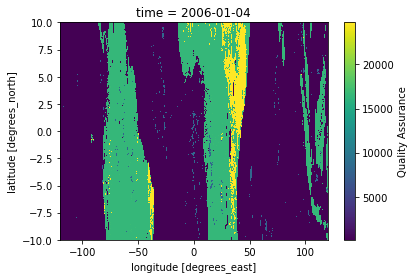

In [316]:
domain['QA'].plot()

In [317]:
flags = domain['QA'].values.astype(int)

In [318]:
flags.shape

(400, 4800)

In [321]:
#extract oceanflag map, bit position counted backwards i.e. -2 = cloud, -4 = water mask
cloud_mask = []
bit_position = -7
for b, i in zip(np.nditer(flags), range(flags.size)):
    #ipdb.set_trace()
    bb = np.flip('{0:016b}'.format(int(b)))  #16bit
    #print(bb)   # bit printout for test
    cloud_mask.append(int(bb[bit_position])) 
cloud_mask = np.reshape(np.array(cloud_mask), flags.shape)

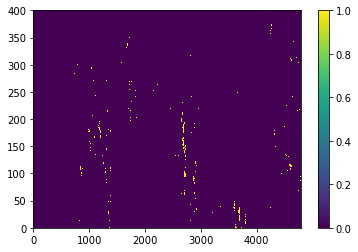

In [322]:
plt.figure()
plt.pcolormesh(cloud_mask)
plt.colorbar()